In [ ]:
!pip install gurobipy
import gurobipy as g

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 17.8 MB/s eta 0:00:00


**Sanity check** whether we have installed Gurobi

In [ ]:
model = g.Model()
model.optimize()

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 0 rows, 0 columns and 0 nonzeros
Model fingerprint: 0xf9715da1
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00


Basic example how to model linear programming problem. Problem contains two variables (we can easily make them integer by changing the appropiate vtype), three constraints and maximization objective.

In [ ]:
import gurobipy as g

# Create empty optimization model.
# In Python, only one environment exists and it is created internally
# in the Model() constructor.
model = g.Model()

# Create variables x, y.
x = model.addVar(lb=0, ub=g.GRB.INFINITY, vtype=g.GRB.CONTINUOUS, name="x")
y = model.addVar(lb=0, ub=g.GRB.INFINITY, vtype=g.GRB.CONTINUOUS, name="y")

# Set objective: maximize 32x + 25y
model.setObjective(32*x + 25*y, sense=g.GRB.MAXIMIZE)

# Add constraint: 5x + 4y <= 59
model.addConstr(5*x + 4*y <= 59, "cons1")

# Add constraint: 4x + 3y <= 46
model.addConstr(4*x + 3*y <= 46, "cons2")

# Solve the model.
model.optimize()

# Number of solutions found by the solver
sol_count = model.getAttr("SolCount")


# Print the objective and the values of the decision variables in the solution.
print("Optimal objective:", model.objVal)
print("x:", x.x, "y:", y.x)
print("Solutions", sol_count)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0xe44d31a6
Coefficient statistics:
  Matrix range     [3e+00, 5e+00]
  Objective range  [2e+01, 3e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 6e+01]
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.7000000e+31   2.875000e+30   5.700000e+01      0s
       2    3.7400000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.740000000e+02
Optimal objective: 374.0
x: 7.0 y: 6.0
Solutions 1


**Diet problem example**

The cook needs to prepare a lunch for pupils. Each lunch needs to contain the minimum amount of each of the nutrient groups, but we also want to produce as cheap lunch as possible.

Nutrients per food type unit:
* potatoes - 2 units of sugars, 2 units of protein, 1 unit of vitamins
* meat - 1 unit of sugars, 6 units of protein, 3 units of vitamins
* vegetables - 1 unit of sugars, 1 unit of protein, 6 units of vitamins

Each meal must contain at least 8 units of sugar, 16 units of protein and 8 units of vitamins. Potatoes cost 25 crowns per unit, meat 50 crowns, vegetables 80 crowns.

In [ ]:
import gurobipy as g

model = g.Model()

# variables
potato = model.addVar(lb=0, vtype=g.GRB.CONTINUOUS, name="p")
meat = model.addVar(lb=0, vtype=g.GRB.CONTINUOUS, name="m")
vegetable = model.addVar(lb=0, vtype=g.GRB.CONTINUOUS, name="v")

# sugar constraint
model.addConstr(2 * potato + 1 * meat + 1 * vegetable >= 8)

# protein constraint
model.addConstr(2 * potato + 6 * meat + 1 * vegetable >= 16)

# vitamin constraint
model.addConstr(1 + potato + 3 * meat + 6 * vegetable >= 8)

# criterion
model.setObjective(25 * potato + 50 * meat + 80 * vegetable, sense=g.GRB.MINIMIZE)

model.optimize()
print("cost ", model.objVal)
print("potatoes ", potato.x)
print("meat ", meat.x)
print("vegetable ", vegetable.x)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 3 rows, 3 columns and 9 nonzeros
Model fingerprint: 0x503da7d6
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [2e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e+00, 2e+01]
Presolve time: 0.01s
Presolved: 3 rows, 3 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.875000e+00   0.000000e+00      0s
       2    1.6000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.600000000e+02
cost  160.0
potatoes  3.2
meat  1.5999999999999999
vegetable  0.0


Alternative model for diet problem using addMVar (matrix input):

In [ ]:
import numpy as np
model = g.Model()

x = model.addMVar(3, vtype=g.GRB.CONTINUOUS)
c = np.array([25, 50, 80])
A = np.array([[2, 1, 1], [2, 6, 1], [1, 3, 6]])
b = np.array([8, 16, 8])

model.addConstr(A@x >= b)
model.setObjective(c@x)

model.optimize()

print("results:", x.x)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 3 rows, 3 columns and 9 nonzeros
Model fingerprint: 0x896fb4d8
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [2e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e+00, 2e+01]
Presolve time: 0.01s
Presolved: 3 rows, 3 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.000000e+00   0.000000e+00      0s
       2    1.6000000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.600000000e+02
results: [3.2 1.6 0. ]


Plot graph of vegetables required as a function of minimum vitamins constraint.

Restricted license - for non-production use only - expires 2025-11-24


Text(0, 0.5, 'vegetables needed [-]')

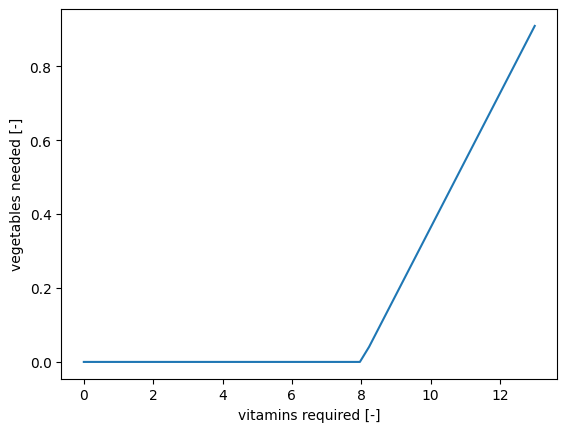

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def compute_diet(vitamins_required=8):
  model = g.Model()
  model.params.OutputFlag = 0   # supressing Gurobi solver output to console

  x = model.addMVar(3, vtype=g.GRB.CONTINUOUS)
  c = np.array([25, 50, 80])
  A = np.array([[2, 1, 1], [2, 6, 1], [1, 3, 6]])
  b = np.array([8, 16, vitamins_required])

  model.addConstr(A@x >= b)
  model.setObjective(c@x)

  model.optimize()
  return x[2].x

vitamins = np.linspace(0, 13, 50)
vegetables_needed = list(map(compute_diet, vitamins))
plt.plot(vitamins, vegetables_needed)
plt.xlabel('vitamins required [-]')
plt.ylabel('vegetables needed [-]')